# Bienvenido a la notebook de procesamiento de outputs en imágenes

Alimentación: modelo de clasificación de emociones - distilbert-base-uncased-go-emotions-student <br />
Contexto: Debate presidencial <br />
Tech-stack: Plotly <br />

In [2]:
import pandas as pd
import pickle, os
from dotenv import load_dotenv
import chart_studio.plotly as py
import chart_studio.tools as tls

load_dotenv()

pd.options.plotting.backend = "plotly"

USER = os.environ["USER_CS"]
TOKEN = os.environ["TOKEN_CS"]
tls.set_credentials_file(username=USER, api_key=TOKEN)

workdir = os.getcwd()
inputs = os.path.join(workdir, "output_model_emotions")

In [3]:
## Introducir bloque a ser analizado
bloque = "bloque_de_preguntas_cruzadas"
### (definir esta variable)


# Carga de datos
inputs_intro = os.path.join(inputs, bloque)
extension = ".pickle"
files = [file for file in os.listdir(inputs_intro) if file.endswith(extension)]
files = sorted(files)

participacion = {}
for file in files:
    with open(os.path.join(inputs_intro, file), "rb") as f:
        participacion[file[:-7]] = pickle.load(f) # [:-7] = remover extension ".pickle"
        
print(participacion.keys())


dict_keys(['47_Bullrich_10_prediccion', '48_Milei_11_prediccion', '49_Schiaretti_10_prediccion', '50_Bullrich_11_prediccion', '51_Massa_10_prediccion', '52_Bregman_10_prediccion', '53_Milei_12_prediccion', '54_Massa_11_prediccion', '55_Bregman_11_prediccion', '56_Schiaretti_11_prediccion', '57_Massa_12_prediccion', '58_Milei_13_prediccion', '59_Schiaretti_12_prediccion', '60_Massa_13_prediccion', '61_Milei_14_prediccion', '62_Bregman_12_prediccion', '63_Bullrich_12_prediccion', '64_Schiaretti_13_prediccion', '65_Bregman_13_prediccion', '66_Bullrich_13_prediccion', '67_Milei_15_prediccion', '68_Schiaretti_14_prediccion', '69_Massa_14_prediccion', '70_Bullrich_14_prediccion', '71_Schiaretti_15_prediccion', '72_Bregman_14_prediccion', '73_Bullrich_15_prediccion', '74_Massa_15_prediccion', '75_Bregman_15_prediccion', '76_Milei_16_prediccion', '77_Bregman_16_prediccion', '78_Massa_16_prediccion', '79_Schiaretti_16_prediccion', '80_Milei_17_prediccion', '81_Bullrich_16_prediccion', '82_Bregm

In [4]:
candidatos = ["Bullrich", "Bregman", "Massa", "Milei", "Schiaretti"]

# Visualización por candidato y por bloque temático

Unificamos los scores de todas las exposiciones de cada candidato.

In [5]:
## [ORIGINAL]
error - es solo un backup - no correr
## [ORIGINAL]
## Hacemos la selección del candidato
candidato = candidatos[0]
### (definir esta variable)


## Obtenemos el dataset de todo el bloque temático con cada una de las interveciones de cada candidato
df_candidatos = pd.DataFrame()
for nombre_participacion in participacion.keys():
    df = participacion[nombre_participacion]
    df_candidatos = pd.concat([df_candidatos, participacion[nombre_participacion]], axis=1)


## Filtramos al candidato en todas sus intervenciones
mascara = df_candidatos.columns.str.contains(candidato) # boolean mask over columns
df_promedios = df_candidatos.loc[:, mascara]

## Promediamos el score de cada línea del discurso de cada intervención en un único score
df_promedios = (df_promedios.sum(axis=1) / df_promedios.sum(axis=1).sum() * 100).round(2)
figure_name = candidato + " | " + bloque.replace("_", " ")
df_promedios.name = figure_name
df_promedios;


##  TRADUCCIONES  ###
## cuarto, cambiamos los nombres de las emociones por su traducción al español# NO TRADUCIR
df_promedios.index = df_promedios.index.str.replace("neutral", "neutro")
df_promedios.index = df_promedios.index.str.replace("disapproval", "desaprobación")
df_promedios.index = df_promedios.index.str.replace("approval", "aprobación")
df_promedios.index = df_promedios.index.str.replace("realization", "auto-realización")
df_promedios.index = df_promedios.index.str.replace("caring", "cuidadoso")
df_promedios.index = df_promedios.index.str.replace("curiosity", "curioso")
df_promedios.index = df_promedios.index.str.replace("confusión", "confundido")
df_promedios.index = df_promedios.index.str.replace("desire", "deseo")
df_promedios.index = df_promedios.index.str.replace("annoyance", "aburrimiento")
df_promedios.index = df_promedios.index.str.replace("gratitude", "gratitud")
df_promedios.index = df_promedios.index.str.replace("excitement", "exaltación")
df_promedios.index = df_promedios.index.str.replace("pride", "orgullo")
df_promedios.index = df_promedios.index.str.replace("remorse", "arrepentimiento")
df_promedios.index = df_promedios.index.str.replace("disappointment", "defraudado")
df_promedios.index = df_promedios.index.str.replace("relief", "aliviado")
df_promedios.index = df_promedios.index.str.replace("admiration", "admiración")
df_promedios.index = df_promedios.index.str.replace("anger", "enojo")
df_promedios.index = df_promedios.index.str.replace("amusement", "asombro")
df_promedios.index = df_promedios.index.str.replace("embarrassment", "avergonzado")
df_promedios.index = df_promedios.index.str.replace("joy", "alegría")
df_promedios.index = df_promedios.index.str.replace("surprise", "sorpresa")
df_promedios.index = df_promedios.index.str.replace("nervousness", "nerviosismo")
df_promedios.index = df_promedios.index.str.replace("love", "amor")
df_promedios.index = df_promedios.index.str.replace("sadness", "tristeza")
df_promedios.index = df_promedios.index.str.replace("grief", "avaricia")
df_promedios.index = df_promedios.index.str.replace("disgust", "desagrado")
df_promedios.index = df_promedios.index.str.replace("optimism", "optimismo")
df_promedios.index = df_promedios.index.str.replace("fear", "miedo")


# # ## quinto, seleccionamos los colores de cada emoción # UTILIZAR COLORES DE LA PAGINA 11
verde = "#FFFF00"
amarillo = "#e926b0"
gris = "#7a9c7d"
rojo = "#00FF00"

# # ROJO: (00FF00)negativo | #198ddc   # verde: (FFFF00)positivo | (#e926b0)neutro   # amarillo: (#7a9c7d)gris | #528fbf


colores = {
    "neutro": gris, "aprobación": verde, "auto-realización": verde,
    "cuidadoso": amarillo, "curioso": amarillo, "confusion": amarillo,
    "desaprobación": rojo, "deseo": verde, "aburrimiento": amarillo,
    "gratitud": verde, "exaltación": verde, "orgullo": verde,
    "arrepentimiento": gris, "defraudado": gris, "aliviado": amarillo,
    "admiración": verde, "enojo": rojo, "asombro": amarillo,
    "avergonzado": gris, "alegría": verde, "sorpresa": amarillo,
    "nerviosismo": gris, "amor": verde, "tristeza": gris,
    "avaricia": rojo, "desagrado": rojo, "optimismo": verde,
    "miedo": rojo
}





# import random
# def random_color_hex():
#     return '#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
# def random_color_RGB():
#     return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
# colores = {emotion: random_color_hex() for emotion in df_promedios.index}


# colores = {emotion: random_color_hex() for emotion in df_promedios.index}

df_promedios = df_promedios.to_frame().reset_index()
df_promedios["colores"] = df_promedios.index.map(colores)
df_promedios;



In [6]:
## [version con colores]
## Hacemos la selección del candidato
candidato = candidatos[0]
### (definir esta variable)


## Obtenemos el dataset de todo el bloque temático con cada una de las interveciones de cada candidato
df_candidatos = pd.DataFrame()
for nombre_participacion in participacion.keys():
    df = participacion[nombre_participacion]
    df_candidatos = pd.concat([df_candidatos, participacion[nombre_participacion]], axis=1)


## Filtramos al candidato en todas sus intervenciones
mascara = df_candidatos.columns.str.contains(candidato) # boolean mask over columns
df_promedios = df_candidatos.loc[:, mascara]

## Promediamos el score de cada línea del discurso de cada intervención en un único score
df_promedios = (df_promedios.sum(axis=1) / df_promedios.sum(axis=1).sum() * 100).round(2)
figure_name = candidato + " | " + bloque.replace("_", " ")
df_promedios.name = figure_name


###   CONFIGURACION DE LOS COLORES   ###
azul_miedo_desagrado = "#473b9e"
rosa_aversion_duda = "#ea76e5"
rojo_tension_entusiasmo = "#901f31"
amarillo_satisfaccion_valor = "#d5d432"
verde_altivez_deseo = "#9cf581"
verde_amor_certeza = "#4bb710"
celeste_calma_aburrimiento = "#80c0ea"
celeste_apatia_tristeza = "#53b7d9"
# neutral = calma | approval = satisfacción | realization: altivez | caring: compasion | curiosidad: duda | confusion: aversion | 
# disapproval: frustracion | desire: deseo | annoyance: aburrimiento | gratitude: valor | excitement: entusiasmo | pride: placer |
# remorse: frustracion | disappointment: frustracion | relief: calma | admiration: alegria | anger: odio | amusement: alegria |
# embarrassment: humillacion | joy: alegria | surprise: diversion | nervousness: tension | love: amor | sadness: tristeza | grief: odio |
# disgust: desagrado | optimism: agrado | fear: miedo
colores = {
    "neutral": celeste_calma_aburrimiento, "approval": amarillo_satisfaccion_valor, "realization": amarillo_satisfaccion_valor,
    "caring": verde_amor_certeza, "curiosity": rosa_aversion_duda, "confusion": rosa_aversion_duda,
    "disapproval": celeste_apatia_tristeza, "desire": verde_altivez_deseo, "annoyance": celeste_calma_aburrimiento,
    "gratitude": amarillo_satisfaccion_valor, "excitement": rojo_tension_entusiasmo, "pride": verde_altivez_deseo,
    "remorse": celeste_apatia_tristeza, "disappointment": celeste_apatia_tristeza, "relief": celeste_calma_aburrimiento,
    "admiration": verde_altivez_deseo, "anger": rojo_tension_entusiasmo, "amusement": amarillo_satisfaccion_valor,
    "embarrassment": azul_miedo_desagrado, "joy": verde_altivez_deseo, "surprise": rojo_tension_entusiasmo,
    "nervousness": rojo_tension_entusiasmo, "love": verde_amor_certeza, "sadness": celeste_apatia_tristeza,
    "grief": rosa_aversion_duda, "disgust": azul_miedo_desagrado, "optimism": verde_altivez_deseo,
    "fear": azul_miedo_desagrado
}
df_promedios = df_promedios.to_frame().reset_index()
df_promedios["colores"] = df_promedios.index.map(colores)
df_promedios;

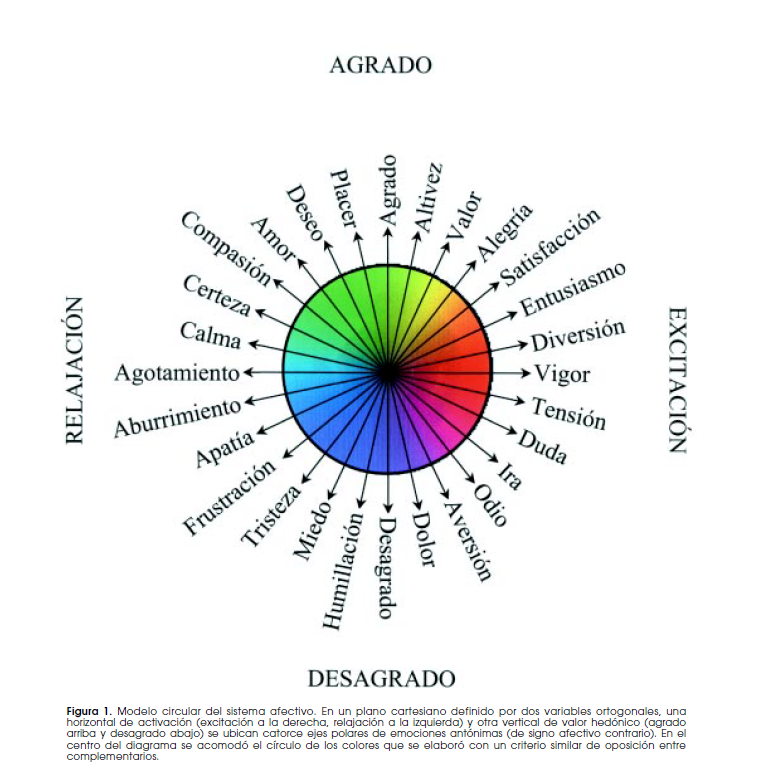


In [8]:
visual_kwargs = {
    "width": 1200,
    "height": 600,
    "template": "plotly_dark",
    "title": f"Análisis de emociones por candidato | bloque: {bloque} | candidato: {candidato}",
    "labels": {"variable": "Emociones", "value": "Porcentaje de emociones", "label": "Emociones"},
    "color": "label",
    "color_discrete_map": colores
    }
# figure = df_promedios.sort_values(by=figure_name ,ascending=False)[figure_name].plot(kind="bar", **visual_kwargs).update_layout(showlegend=False)
figure = df_promedios.sort_values(by=figure_name ,ascending=False).plot(kind="bar", x="label", y=figure_name, **visual_kwargs).update_layout(showlegend=False)
figure
# ROJO: (00FF00)negativo | #198ddc   # verde: (FFFF00)positivo | #bcb03a | (#e926b0)neutro  # azul: D3D3D3   # violeta: FF0000   # amarillo: (#7a9c7d)gris | #528fbf


In [7]:
"""
SELECCION DE COLORES:


1. azúl: (miedo - desagrado): #473b9e

2. rosa: (aversión - duda): #ea76e5

3. rojo (tensión - entusiasmo): #901f31

4. amarillo: (valor - alegría): #d5d432

5. verde: (valor - deseo): #9cf581

6. verde: (amor - compasión): #4bb710

7. celeste: (certeza - aburrimiento): #80c0ea

8. celeste: (apatía - tristeza): #53b7d9
""";

In [8]:
colores;

In [10]:
colores

{'curiosity': '#c7b769',
 'confusion': '#52c511',
 'caring': '#8d0ee2',
 'excitement': '#53c787',
 'approval': '#bc67db',
 'desire': '#30b6ba',
 'neutral': '#353417',
 'annoyance': '#00950a',
 'amusement': '#9ec839',
 'realization': '#70af24',
 'gratitude': '#60f353',
 'disapproval': '#3bb487',
 'anger': '#0a8032',
 'remorse': '#ecc468',
 'pride': '#460294',
 'admiration': '#3cb54d',
 'nervousness': '#7801f1',
 'surprise': '#c9afc5',
 'embarrassment': '#a98189',
 'relief': '#227104',
 'joy': '#3536fd',
 'love': '#879b3c',
 'disappointment': '#99a9f4',
 'grief': '#1aa3cd',
 'sadness': '#256b6f',
 'disgust': '#def4e5',
 'optimism': '#afee09',
 'fear': '#c15a71'}

In [28]:
py.plot(figure, filename=figure_name, auto_open=True)

'https://plotly.com/~catag8950/34/'

### Histograma

In [20]:
# df_candidatos
# mascara = df_candidatos.columns.str.contains(candidato) # boolean mask over columns
# df_candidato = df_candidatos.loc[:, mascara]
# df_candidato#.plot(kind="hist")

df_promedios.set_index("label").plot(kind="hist")

In [65]:
df_candidatos = df_candidatos.mask(df_candidatos < 4.0)


# ###TODO: DRY - es tamos repitiendo código

mascara = df_candidatos.columns.str.contains(candidato) # boolean mask over columns
df_promedios = df_candidatos.loc[:, mascara]

# ## Promediamos el score de cada línea del discurso de cada intervención en un único score
df_promedios = (df_promedios.sum(axis=1) / df_promedios.sum(axis=1).sum() * 100).round(2)
figure_name = candidato + " | " + bloque.replace("_", " ")
df_promedios.name = figure_name


import random

def random_color_hex():
    return '#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# def random_color_RGB():
#     return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

colores = {emotion: random_color_hex() for emotion in df_promedios.index}

df_promedios = df_promedios.to_frame().reset_index()

visual_kwargs = {
    "width": 1200,
    "height": 600,
    "template": "plotly_dark",
    "title": f"Análisis de emociones por candidato | bloque: {bloque} | candidato: {candidato}",
    "labels": {"variable": "Emociones", "value": "Porcentaje de emociones", "label": "Emociones"},
    "color": "label",
    "color_discrete_map": colores
    }
# figure = df_promedios.sort_values(by=figure_name ,ascending=False)[figure_name].plot(kind="bar", **visual_kwargs).update_layout(showlegend=False)
figure = df_promedios.sort_values(by=figure_name, ascending=False).plot(kind="bar", x="label", y=figure_name, **visual_kwargs).update_layout(showlegend=False)
df_promedios
figure

In [66]:
colores

{'curiosity': '#0184c5',
 'confusion': '#b38297',
 'caring': '#9cf581',
 'excitement': '#cb8c2e',
 'approval': '#6aa375',
 'desire': '#836c40',
 'neutral': '#5b0052',
 'annoyance': '#2bbf7e',
 'amusement': '#3e4edd',
 'realization': '#23d6ad',
 'gratitude': '#5967bb',
 'disapproval': '#3cf970',
 'anger': '#b05c98',
 'remorse': '#cac961',
 'pride': '#41c571',
 'admiration': '#51056c',
 'nervousness': '#fe48d8',
 'surprise': '#4f7685',
 'embarrassment': '#3383b8',
 'relief': '#331a9c',
 'joy': '#7575bd',
 'love': '#4ecdac',
 'disappointment': '#47e8ef',
 'grief': '#07b06f',
 'sadness': '#a0c36a',
 'disgust': '#aa222e',
 'optimism': '#a27a4b',
 'fear': '#f049da'}

In [ ]:
"""
SELECCION DE COLORES:


1. azúl: (miedo - desagrado): #473b9e

2. rosa: (aversión - duda): #ea76e5

3. rojo (tensión - entusiasmo): #901f31

4. amarillo: (valor - alegría): #d5d432

5. verde: (valor - deseo): #9cf581

6. verde: (amor - compasión): #4bb710

7. celeste: (certeza - aburrimiento): #80c0ea

8. celeste: (apatía - tristeza): #53b7d9
""";

## Visualización por bloque temático

In [3]:
###  DOCS: Tratamiento de la data  ###

# 1. Abrimos el archivo
# 2. Sumamos los scores de cada emocion detectada en cada línea del discruso
# 3. Normalizamos los scores en función de la cantidad de línea
# 4. Aplicar un filtro para quedarnos con las emociones más relevantes (para no tener 28 columnas)
#  de las 28 emociones, nos quedamos con las 5 más relevantes
# 5. Visualización de cada candidato por bloque -> armar un dataset -> reemplazar el score por la label (o el score representa la altura de la barra)



df_visualizacion = pd.DataFrame()

for nombre_participacion in participacion.keys():

# nombre_participacion = list(participacion.keys())[1]
    df = participacion[nombre_participacion]
    nombre_participacion = "_".join(nombre_participacion.split("_")[:-1])
    score_total = df.sum(axis=1).sum()
    df_promedio = (df.sum(axis=1) / score_total * 100)
    df_promedio = df_promedio.to_frame()
    df_promedio.columns = [nombre_participacion]
    df_visualizacion = pd.concat([df_visualizacion, df_promedio], axis=1)

# df_visualizacion.reset_index().plot(kind="bar")

visual_kwargs = {"template": "plotly_dark", "title": f"Emociones totales durante cada discurso | bloque: {bloque}"}
df_visualizacion.plot(kind="bar", **visual_kwargs)#, hue="index", title="Frecuencia de emociones en el corpus")



In [15]:
## Acá aplicamos un filtro de las 5 emociones más relevantes

priorizando_candidato = 1
candidato_priorizado = list(df_visualizacion.columns)[priorizando_candidato]
print(f"Priorizando candidato: {candidato_priorizado}")
df_aux = df_visualizacion.sort_values(by=candidato_priorizado, ascending=False).T
muestra = df_aux.iloc[:,:10]#.plot(kind="bar", x=df_aux.columns, title="Frecuencia de emociones en el corpus", template="plotly_dark")

visual_kwargs = {"template": "plotly_dark", "title": f"Emociones predominantes durante cada discurso | bloque: {bloque}"}
muestra.plot(kind="bar", x=muestra.columns, **visual_kwargs)

Priorizando candidato: 07_Bregman_2


In [17]:
# Qué hago con esto?
df_visualizacion.stack().to_frame().reset_index()

,label,level_1,0
0,neutral,06_Bullrich_2,5.904653
1,neutral,07_Bregman_2,4.936099
2,neutral,08_Schiaretti_2,6.607107
3,neutral,09_Milei_2,6.123946
4,neutral,10_Massa_2,5.270876
...,...,...,...
387,optimism,15_Bregman_3,2.165269
388,optimism,16_Milei_3,1.904313
389,optimism,17_Bullrich_4,2.457746
390,optimism,18_Schiaretti_4,1.684916
